In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
avar_bounds = np.load("xxxxxxxxxxxxx/avar_bound_all_experiments.npy", allow_pickle=True)
true_avar_bounds = np.load("xxxxxxxxxxxxx/true_avar_bounds_all_experiments.npy", allow_pickle=True)

data_99 = [i[0.99] for i in avar_bounds[:]]
data_95 = [i[0.95] for i in avar_bounds[:]]
data_90 = [i[0.90] for i in avar_bounds[:]]
data_85 = [i[0.85] for i in avar_bounds[:]]

true_avar = [i for i in true_avar_bounds[:]]

In [3]:
len(true_avar)

8

[0.005732868568466146, 0.0, 0.012733874227786119, 0.0, 0.0, 0.0005275379482042696, 0.08446667806366881, 0.027731564475334144]


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of ticklabels (5).

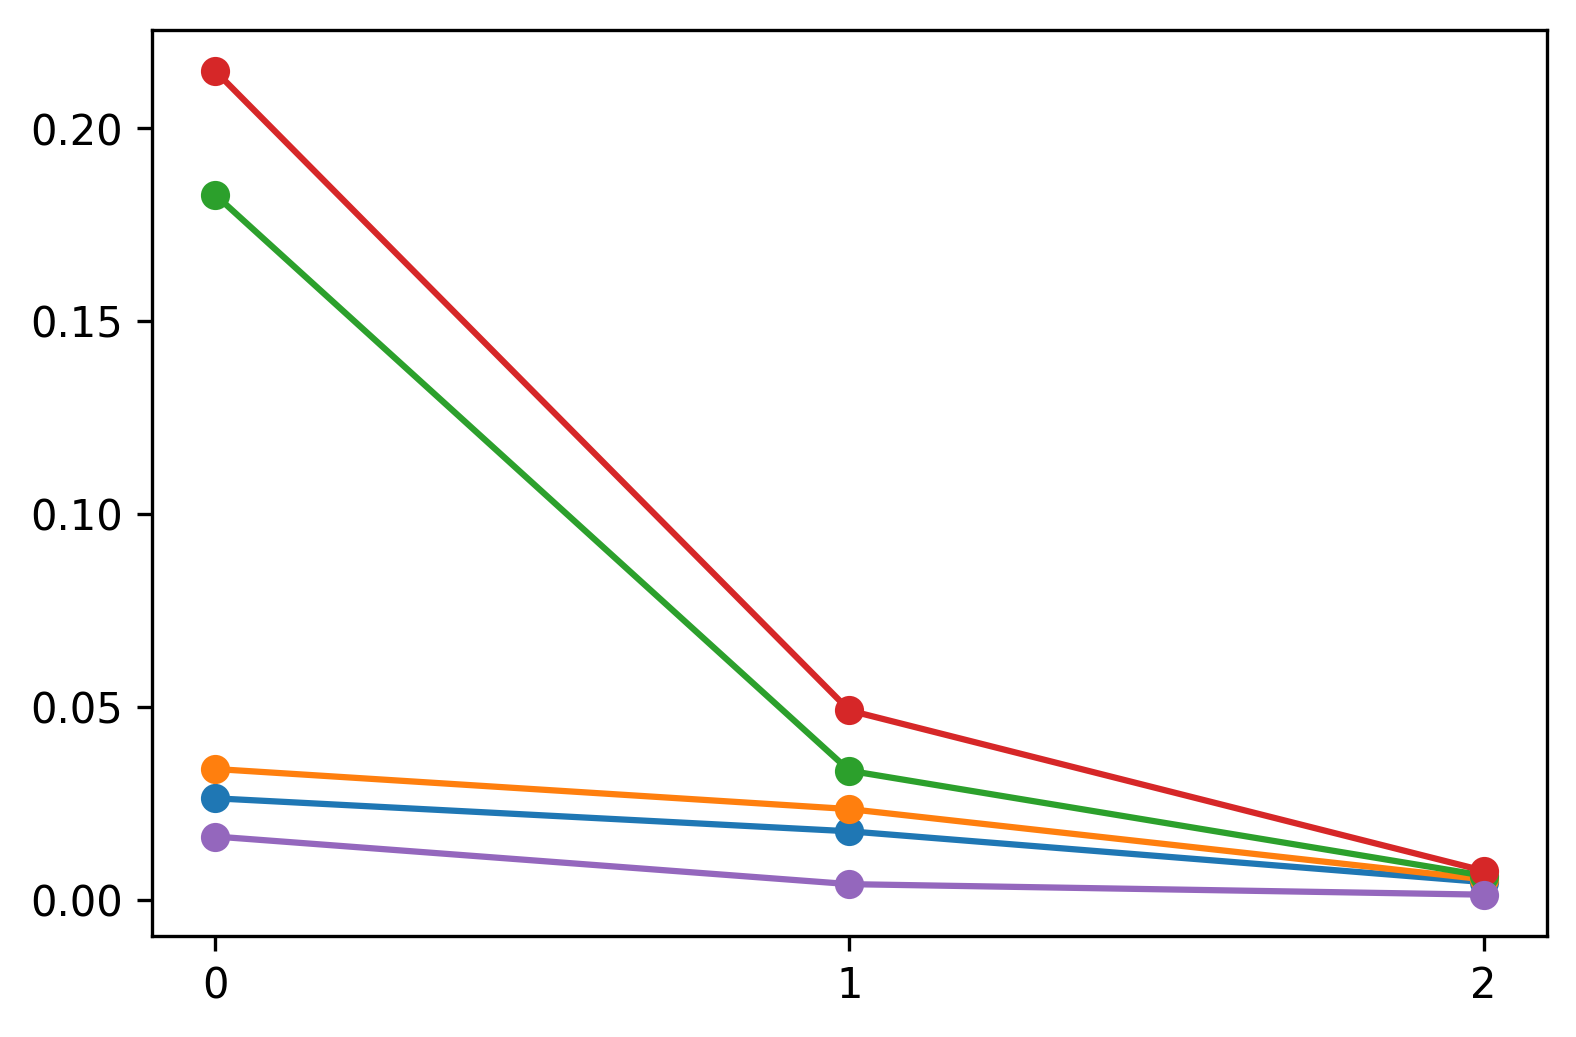

In [4]:
# Organize data by keys
data_by_key_85 = {i:[] for i in range(len(data_85[0]))}
for entry in data_85:
    for key in entry:
        data_by_key_85[key].append(entry[key][0])


# Organize data by keys
data_by_key_90 = {i:[] for i in range(len(data_85[0]))}
for entry in data_90:
    for key in entry:
        data_by_key_90[key].append(entry[key][0])


# Organize data by keys
data_by_key_95 = {i:[] for i in range(len(data_85[0]))}
for entry in data_95:
    for key in entry:
        data_by_key_95[key].append(entry[key][0])

# Organize data by keys
data_by_key_99 = {i:[] for i in range(len(data_85[0]))}
for entry in data_99:
    for key in entry:
        data_by_key_99[key].append(entry[key][0])

# Organize data by keys
true_val = {i:[] for i in range(len(data_85[0]))}
for entry in true_avar:
    for key in entry:
        true_val[key].append(entry[key][0])

print(true_val[0])
# Calculate mean and std for each key
means_85 = [np.mean(data_by_key_85[key]) for key in data_by_key_85]
stds_85 = [np.std(data_by_key_85[key]) for key in data_by_key_85]

means_90 = [np.mean(data_by_key_90[key]) for key in data_by_key_90]
stds_90 = [np.std(data_by_key_90[key]) for key in data_by_key_90]

means_99 = [np.mean(data_by_key_99[key]) for key in data_by_key_99]
stds_99 = [np.std(data_by_key_99[key]) for key in data_by_key_99]

means_95 = [np.mean(data_by_key_95[key]) for key in data_by_key_95]
stds_95 = [np.std(data_by_key_95[key]) for key in data_by_key_95]

true_means = [np.mean(true_val[key]) for key in true_val]
true_stds = [np.std(true_val[key]) for key in true_val]

x_values = list(range(len(data_85[0])))

plt.figure(figsize=(6,4), dpi=300)
# Plot
plt.plot(x_values, means_85, marker='o', linestyle='-', label="0.85")
#plt.errorbar(x_values, means_85, yerr=stds_85, fmt='o', capsize=5)

plt.plot(x_values, means_90, marker='o', linestyle='-', label="0.90")
#plt.errorbar(x_values, means_90, yerr=stds_90, fmt='o', capsize=5)

plt.plot(x_values, means_95, marker='o', linestyle='-', label="0.95")
#plt.errorbar(x_values, means_95, yerr=stds_95, fmt='o', capsize=5)

plt.plot(x_values, means_99, marker='o', linestyle='-', label="0.99")
#plt.errorbar(x_values, means_99, yerr=stds_99, fmt='o', capsize=5)

plt.plot(x_values, true_means, marker='o', linestyle='-', label="True")
#plt.errorbar(x_values, true_means, yerr=true_stds, fmt='o', capsize=5)

plt.xticks(x_values, ['1', '2', '3', '4', '5'])
plt.xlabel("No. Demos")
plt.ylabel("nEVD")
plt.title("Avg of nEVD/Comparison - 50 Trials")
plt.legend()
plt.savefig("comparison.jpeg", dpi=300)
plt.show()

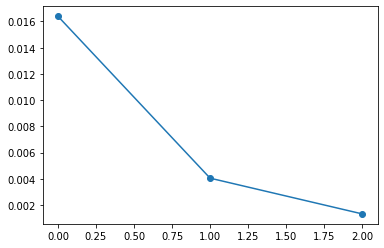

In [5]:
info_gain = np.load("xxxxxxxxxxxxx/info_gain_all_experiments.npy", allow_pickle=True)

true_info = [i for i in info_gain[:]]

# Organize data by keys
true_infogain = {i:[] for i in range(len(data_85[0]))}
for entry in true_info:
    for key in entry:
        true_infogain[key].append(entry[key][0])

true_info_means = [np.mean(true_val[key]) for key in true_val]
true_info_stds = [np.std(true_val[key]) for key in true_val]

plt.plot(x_values, true_info_means, marker='o', linestyle='-', label="True")

In [ ]:
import numpy as np

# Define MDP parameters
states = ["s0", "s1"]
actions = ["a0", "a1"]
rewards = {
    ("s0", "a0"): 1,  # Reward for moving from s0 to s1
    ("s0", "a1"): 0,  # Reward for staying in s0
    ("s1", "a0"): 1,  # Reward for moving from s1 to s0
    ("s1", "a1"): 0   # Reward for staying in s1
}
transitions = {
    ("s0", "a0"): "s1",
    ("s0", "a1"): "s0",
    ("s1", "a0"): "s0",
    ("s1", "a1"): "s1"
}

# Discount factor
gamma = 1  # No discounting

# Initialize value function
V = {state: 0 for state in states}

# Value iteration parameters
num_iterations = 500  # Number of iterations to run
threshold = 1e-5  # Convergence threshold

def value_iteration(V, gamma, num_iterations):
    for i in range(num_iterations):
        delta = 0  # To track changes in value updates
        new_V = V.copy()  # Copy current values for synchronous update
        
        for state in states:
            action_values = []
            for action in actions:
                next_state = transitions[(state, action)]
                reward = rewards[(state, action)]
                action_value = reward + gamma * V[next_state]
                action_values.append(action_value)
            
            # Update the value for the current state
            new_V[state] = max(action_values)
            delta = max(delta, abs(new_V[state] - V[state]))
        
        # Update V
        V = new_V
        
        # Print values for each iteration to see if it converges
        print(f"Iteration {i+1}: {V}")
        
        # Check for convergence
        if delta < threshold:
            print("Converged!")
            break
    else:
        print("Value iteration did not converge.")
    
    return V

# Run value iteration
V_final = value_iteration(V, gamma, num_iterations)
print("Final Value Function:", V_final)

In [ ]:
data_dicts = [{0.85: {0: [0.02591877664813261], 1: [-0.022411472188782356], 2: [0.0022126490942958434]}, 0.9: {0: [0.09316253564436236], 1: [0.01773783819850764], 2: [0.03212034656897985]}, 0.95: {0: [0.25717031169209936], 1: [0.09747782005372492], 2: [0.08990296182165161]}, 0.99: {0: [1.104448165591206], 1: [0.45955154033408047], 2: [0.5881044970469209]}}
,
{0.85: {0: [0.008645942429320376], 1: [0.01920114418145047], 2: [-0.009905501733353432]}, 0.9: {0: [0.059367603267949744], 1: [0.08162432858430173], 2: [0.01586368410987541]}, 0.95: {0: [0.3200282516689596], 1: [0.13984367740159678], 2: [0.07728777040263811]}, 0.99: {0: [1.1048492423403136], 1: [0.33775581303206], 2: [0.35616481286825796]}}
,
{0.85: {0: [0.09682257089691368], 1: [0.0043463684202928975], 2: [-0.019627580697506728]}, 0.9: {0: [0.7685858390022723], 1: [0.03793160456656284], 2: [0.009474387178510565]}, 0.95: {0: [1.1055364270550463], 1: [0.13001362861091312], 2: [0.0658723501551812]}, 0.99: {0: [1.106855328898945], 1: [0.4146888001781893], 2: [0.31402217840670005]}}
,
{0.85: {0: [0.0037269241932339887], 1: [0.0022756160255292942], 2: [0.025634602714296132]}, 0.9: {0: [0.033470608581918054], 1: [0.025987964024789194], 2: [0.07148784802934835]}, 0.95: {0: [0.08884033236153478], 1: [0.08507994672735121], 2: [0.18168012143305753]}, 0.99: {0: [0.313427173930036], 1: [0.2838191384908811], 2: [0.42850942017254406]}}
,
{0.85: {0: [0.003577155483933114], 1: [0.018185166133122144], 2: [0.0032607230944746352]}, 0.9: {0: [0.03486260017897337], 1: [0.049510027161676615], 2: [0.033766861016642946]}, 0.95: {0: [0.10934083818310884], 1: [0.11441842308352333], 2: [0.07140144318549624]}, 0.99: {0: [0.483740333859034], 1: [0.2919706811595511], 2: [0.21798217293681824]}}
,
{0.85: {0: [0.023630102819283447], 1: [0.0033736488913496607], 2: [0.018645765994755325]}, 0.9: {0: [0.05545840964008363], 1: [0.03600748838396072], 2: [0.05424574878600376]}, 0.95: {0: [0.10921326782763634], 1: [0.09626481741269592], 2: [0.1990048472234946]}, 0.99: {0: [0.3777072829550106], 1: [0.3531826057402795], 2: [0.42815591624233884]}}
,
{0.85: {0: [0.017524878169096623], 1: [-0.011464590008132491], 2: [-0.004718142394416795]}, 0.9: {0: [0.05116268954565813], 1: [0.03891811418436703], 2: [0.043602847902685]}, 0.95: {0: [0.11800631907456799], 1: [0.13369721866347106], 2: [0.09548562861681183]}, 0.99: {0: [0.2889189819956108], 1: [0.30598339912585976], 2: [0.337262147458824]}}
,
{0.85: {0: [0.013456808253805555], 1: [0.020253950445355006], 2: [0.00974169143793412]}, 0.9: {0: [0.04409176220324951], 1: [0.0444057920194048], 2: [0.058965703161402566]}, 0.95: {0: [0.12352259942842059], 1: [0.09587334176295612], 2: [0.16807979944950693]}, 0.99: {0: [0.2815339361673999], 1: [0.4806278014957095], 2: [0.37648995122266204]}}
,
{0.85: {0: [0.024169359535593182], 1: [0.011251294251384405], 2: [0.0018355654463317278]}, 0.9: {0: [0.09004155816620672], 1: [0.06475414731375838], 2: [0.040223006468061366]}, 0.95: {0: [0.8158878937801478], 1: [0.1622677617289789], 2: [0.16789221747387495]}, 0.99: {0: [1.105048110906748], 1: [6.341716652427909], 2: [10.760226827400915]}}
,
{0.85: {0: [0.06416372798338899], 1: [0.004363068557107779], 2: [-0.010192485287572146]}, 0.9: {0: [0.15732877230376732], 1: [0.056331962974127396], 2: [0.00805689175342921]}, 0.95: {0: [1.1046813388518038], 1: [0.14571319022067553], 2: [0.0549527336150177]}, 0.99: {0: [1.1064802519667287], 1: [0.36154617180522575], 2: [0.3855563580404422]}}
,
{0.85: {0: [0.01588033967160927], 1: [0.007247949388423639], 2: [-0.00606802267938363]}, 0.9: {0: [0.04293614500112588], 1: [0.047852257308076435], 2: [0.028476711976842907]}, 0.95: {0: [0.09773320763975571], 1: [0.10748313985720208], 2: [0.11650958866209556]}, 0.99: {0: [0.21732239241486717], 1: [0.4258647994273056], 2: [0.37380651106648527]}}
,
{0.85: {0: [0.11901886695401401], 1: [-0.01806713753132556], 2: [0.003948608476892097]}, 0.9: {0: [1.1008798779675062], 1: [0.01607861116920706], 2: [0.04775925628590558]}, 0.95: {0: [1.1050659184297151], 1: [0.10026726189187155], 2: [0.14754961953624673]}, 0.99: {0: [2.780633724319536], 1: [0.2763039436344394], 2: [0.4169482274283908]}}
,
{0.85: {0: [0.054512467711892755], 1: [-0.023042347949826424], 2: [0.008842555233276716]}, 0.9: {0: [0.25877648462813196], 1: [0.01586456723728979], 2: [0.04941631375941335]}, 0.95: {0: [1.1024605680949449], 1: [0.07827503730619623], 2: [0.15134475139381628]}, 0.99: {0: [1.6621246772296323], 1: [0.257393093005599], 2: [0.3724091859996544]}}
,
{0.85: {0: [0.006743820346554995], 1: [-0.019260992173930604], 2: [0.023967957665087712]}, 0.9: {0: [0.03683929181435889], 1: [0.010516715762654748], 2: [0.06295274378418896]}, 0.95: {0: [0.09477763827997777], 1: [0.07488677366696359], 2: [0.15330794223411054]}, 0.99: {0: [0.2133707502340604], 1: [0.18965147294178658], 2: [0.40276424126445937]}}
,
{0.85: {0: [0.037826044153668616], 1: [-0.0027276149248907067], 2: [-0.01218031696792633]}, 0.9: {0: [0.11884819615001921], 1: [0.026987964266311223], 2: [0.009574167596502453]}, 0.95: {0: [1.0878974707676508], 1: [0.109379201731725], 2: [0.09223432572147966]}, 0.99: {0: [1.1070215186102719], 1: [0.48199555739955857], 2: [0.35316814649304984]}}
,
{0.85: {0: [0.0324173012364412], 1: [0.016575984184385335], 2: [-0.008465187099107105]}, 0.9: {0: [0.05672061149188637], 1: [0.06849267558160946], 2: [0.0288968472978137]}, 0.95: {0: [0.1257858990116383], 1: [0.17495323595392567], 2: [0.14251904442863983]}, 0.99: {0: [0.31107600124987855], 1: [6.672688841789203], 2: [0.31571182606119996]}}
,
{0.85: {0: [0.013578018737914642], 1: [0.006128336085438242], 2: [-0.006207892723606702]}, 0.9: {0: [0.054363652734201254], 1: [0.03571862881688436], 2: [0.029013691482803045]}, 0.95: {0: [0.12900052333220463], 1: [0.09958363219644314], 2: [0.11391839749466463]}, 0.99: {0: [0.4164031774213644], 1: [0.3391379011376177], 2: [0.3638114157210401]}}
,
{0.85: {0: [0.011708913412665417], 1: [0.003555798270016593], 2: [0.03484918417776083]}, 0.9: {0: [0.03367339186903615], 1: [0.03100479860093415], 2: [0.08138451573540596]}, 0.95: {0: [0.10259367934807136], 1: [0.08129355502676783], 2: [0.14440283690054795]}, 0.99: {0: [0.38074187215366406], 1: [0.4186321696930897], 2: [0.3238351678909924]}}
,
{0.85: {0: [0.014634968274244254], 1: [0.015203646912290503], 2: [-0.00041125953583150447]}, 0.9: {0: [0.04499867050016674], 1: [0.05826050555687197], 2: [0.02876049494558782]}, 0.95: {0: [0.10946349884958727], 1: [0.10567770343278828], 2: [0.14379987661496557]}, 0.99: {0: [0.5063855173311103], 1: [2.0664496830269212], 2: [1.5181004718436804]}}
,
{0.85: {0: [0.12680524359686893], 1: [-0.028991159601625092], 2: [0.015878342568514135]}, 0.9: {0: [0.44416082213629815], 1: [-0.008060071545611239], 2: [0.06202737889499113]}, 0.95: {0: [1.103794698141299], 1: [0.08241638250373373], 2: [0.13355010383541685]}, 0.99: {0: [1.1071631085283347], 1: [1.7850071827026281], 2: [0.37876639657182964]}}
,
{0.85: {0: [0.17867136565942512], 1: [-0.004847752736279443], 2: [0.028249841735974463]}, 0.9: {0: [1.0984088000224084], 1: [0.03299568452604737], 2: [0.0745539065641042]}, 0.95: {0: [1.1060159232991014], 1: [0.13294818992473467], 2: [0.13907372518215005]}, 0.99: {0: [1.107525589369904], 1: [0.3071194531883472], 2: [0.37363123910263607]}}
,
{0.85: {0: [0.002725702931397533], 1: [0.032397207656844854], 2: [-0.009949230301105425]}, 0.9: {0: [0.0442811790329825], 1: [0.06728887031202466], 2: [0.03103209905976631]}, 0.95: {0: [0.10038771008740155], 1: [0.1282785610130766], 2: [0.11062410018108433]}, 0.99: {0: [0.3511393296330245], 1: [0.2988014538760614], 2: [0.26327075271070155]}}
,
{0.85: {0: [0.004143210983751405], 1: [-0.017571197471745383], 2: [-0.010717430010327798]}, 0.9: {0: [0.0633236259423437], 1: [0.0170266978370519], 2: [0.024661379392177833]}, 0.95: {0: [0.31457029080189464], 1: [0.08732385883870883], 2: [0.11735397947262248]}, 0.99: {0: [1.1049828179903682], 1: [0.3263288411908452], 2: [0.2987704867656157]}}
,
{0.85: {0: [0.010509493358794886], 1: [0.011042555306612958], 2: [-0.024195894824830783]}, 0.9: {0: [0.038027386860993696], 1: [0.038349145471195854], 2: [0.00782624055871012]}, 0.95: {0: [0.09348854173795687], 1: [0.11133016945114606], 2: [0.06989658936576076]}, 0.99: {0: [0.29743519569066673], 1: [0.31969088848714783], 2: [0.2942149846356852]}}
,
{0.85: {0: [0.007370490730389359], 1: [0.020956159935041477], 2: [-0.019224517003811874]}, 0.9: {0: [0.033635444946911515], 1: [0.06480552155083855], 2: [0.02655967058204714]}, 0.95: {0: [0.09048711821381485], 1: [0.14599493075206693], 2: [0.12064797223602955]}, 0.99: {0: [0.29065559305276284], 1: [0.4512647040942731], 2: [1.8229277314037693]}}
,
{0.85: {0: [0.016489786039801675], 1: [-0.020440554144519712], 2: [0.00152768673112546]}, 0.9: {0: [0.04885932000189652], 1: [0.012909147013203798], 2: [0.04649918530238282]}, 0.95: {0: [0.11705285170813214], 1: [0.07129518014975661], 2: [0.14942663290126207]}, 0.99: {0: [0.3318686270307737], 1: [0.24778449498343078], 2: [0.5453388265509609]}}
,
{0.85: {0: [0.004370763508107207], 1: [0.03359522557946957], 2: [0.00958904718273908]}, 0.9: {0: [0.03773462051752958], 1: [0.08341394643762262], 2: [0.08324986295527108]}, 0.95: {0: [0.08599616766364401], 1: [0.16137895500887225], 2: [0.1754724777189706]}, 0.99: {0: [0.39046948661692066], 1: [0.3258631253480732], 2: [17.61168478211951]}}
,
{0.85: {0: [0.00968216432052383], 1: [0.00953324724512131], 2: [-0.019424226334159776]}, 0.9: {0: [0.04488199204399142], 1: [0.03817269109114545], 2: [0.027170302005877695]}, 0.95: {0: [0.08842922182737094], 1: [0.09864610779162057], 2: [0.09688898627845742]}, 0.99: {0: [0.2631304773374697], 1: [0.24840650245074847], 2: [0.4971816689776801]}}
,
{0.85: {0: [0.08988821436798893], 1: [-0.0057102005239340935], 2: [-0.0009943349986275222]}, 0.9: {0: [0.4321180681858029], 1: [0.01995309149978605], 2: [0.03339568058028933]}, 0.95: {0: [1.103205920738928], 1: [0.07355696009584371], 2: [0.14564684350664805]}, 0.99: {0: [1.1081145459174122], 1: [0.2761196659309985], 2: [0.3338979091504794]}}
,
{0.85: {0: [0.04136697609508863], 1: [-0.002510127112307148], 2: [-0.016848968216508924]}, 0.9: {0: [0.09594850121791111], 1: [0.04993316132995183], 2: [0.022908431519414848]}, 0.95: {0: [1.088631039169261], 1: [0.14294696213315133], 2: [0.10858104599295476]}, 0.99: {0: [1.490242970038572], 1: [0.4390137618086295], 2: [0.24377228348391555]}}
,
{0.85: {0: [-0.006477876387309391], 1: [0.028489084916955457], 2: [-0.0023204123926522952]}, 0.9: {0: [0.022385783373860452], 1: [0.06308875973025556], 2: [0.035377759254381504]}, 0.95: {0: [0.07815860486111816], 1: [0.1394352004832074], 2: [0.13489003686611006]}, 0.99: {0: [0.26939007426878625], 1: [0.36604691982971416], 2: [0.36997364657882736]}}
,
{0.85: {0: [0.010470695854005875], 1: [-0.0009273444814993292], 2: [0.022432927757740945]}, 0.9: {0: [0.04239186837345724], 1: [0.02925790695834603], 2: [0.07087403673430165]}, 0.95: {0: [0.10465451244452864], 1: [0.08774655482008725], 2: [0.11544228432979499]}, 0.99: {0: [0.3183703485434086], 1: [0.36553607994564524], 2: [0.3531082007339098]}}
,
]



data_lists = [[1.181164797207261, 0.26326285379518366, 0.3524504024612184, 0.35290942057022945, 0.3524504024612184, 0.15868412106748633, -0.008205647258787595, -0.007542027000524508, 1.1503502918215636, 0.4068863014299501, -0.00736061427679603, -0.0062593389184425275, -0.008906235977979274, 0.40449977712710294, 0.3525204949088224, 0.3587351714546788, -0.006139249132056243, -0.004373215511485409, 0.3518847159470841, 0.3519427816790118, -0.004373215511485409, -0.006066671947159272, -0.006066671947159272, -0.004949799417844248, -0.0062593389184425275, 0.35330656802372506, -0.006066671947159272, 0.44929543326605254, 0.35338868439834725, 0.35171473678821574]
,
[2.1289026031548985, 0.007990317485301941, 1.5642336395980945, 1.56000523283256, 1.5618430575605393, 1.562585868040768, 0.5984649465701511, 2.322780669538997, -0.006669960439156449, 2.1289026031548985, 2.1927276596823773, 0.5863861609894971, 2.150100444520911, -0.004437016781157709, -0.004120033275351939, -0.002814341687505691, 0.5822368699818192, -0.0073339942339168615, -0.007220042081260901, -0.007596775485519233, -0.0025254129887207835, 0.5820058550420154, -0.005050901572322669, -0.008327307513317476, -0.008327307513317476, -0.003931580960538784, -0.006852197396163845, -0.004684775780145072, 0.0024927138155740078, -0.007510451093514341]
,
[1.2192215514340021, 1.0214942628046357, 0.0038033840147295886, 1.0220078485117368, 1.0262394935443937, 0.002255561927501088, 0.40109333092908694, -0.007518841339882839, 0.4248301806996424, -0.004667548710786402, 0.3929668007612529, 0.3929668007612529, 0.3849023566898807, 0.39019254031569256, -0.007518841339882839, 0.006803282576163308, 0.39230395488757486, -0.001774817762721054, 0.39267571484588565, 0.39016264123410765, 0.3903433863283915, 0.3905183084721821, -0.0036930460897641234, 1.0837004986681906, 0.0022622386286020616, 1.0206632471435009, 0.0019262396644244512, 0.38658315699005735, 0.4173115500342645, 0.39111541837001257]
,
[2.7050929958935086, 0.24274348527918835, 0.8792110943723347, 0.8779077560690463, 0.23950213289293829, -0.0012075321747261716, 0.8795727458763326, 0.8795727458763326, -0.005421392716729076, -0.006739731453391616, 0.8807501301779337, 0.8807501301779337, -0.00898177538119238, -0.008306806664643883, 0.23911775019925224, -0.008306806664643883, 0.8810263031016621, 0.8807501301779337, 0.8803042281942338, -0.0016957127495354407, 0.878585605673866, -0.009654308970504434, 0.8792110943723347, -0.008751283327327235, -0.0016957127495354407, 0.8803458687582771, 0.8795727458763326, -0.009654308970504434, -0.008306806664643883, -0.008306806664643883]
,
[1.4412849480962184, 0.3872671256039988, -0.010101010101024498, -0.010027360651624281, -0.008816993453309316, -0.010101010101024498, -0.010101010101024498, 0.8327388903352088, -0.008992406577756079, -0.008992406577756079, -0.00909948566196376, -0.00909948566196376, 0.787566440781207, -0.007603593138711132, -0.007709497207378484, 0.7787921944152579, 0.5759407183023318, -0.007934124856572189, -0.007129577801602377, 0.7796776075202569, 0.7745000450393718, -0.007603593138711132, 0.7797304797082331, -0.007934124856572189, 0.5753751703539501, 0.7847738389855458, -0.008069386134731918, -0.006213725952830972, -0.0064474459886004485, -0.00633990870291341]
,
[1.7953605255427172, 0.5463030353454211, -0.009189122538038701, 1.2793976949095662, 0.5368822698484187, 1.264842044953432, -0.007733698044304166, 0.5380942009233592, -0.007733698044304166, -0.009189122538038701, -0.009189122538038701, -0.009189122538038701, 0.5301783306120889, 0.5350393362136885, 0.5348259141144174, 0.5377985277883983, 0.5113244288108748, 0.2764907832627873, 0.5348259141144174, 0.5177185509973194, 0.5117855347727124, 0.5368822698484187, 0.17967158810426767, -0.009178008347162248, 0.007398024621567244, 0.5371734698824439, 0.17986127523874665, 0.3368031775664129, 0.18001526095852632, 0.5367676742658721]
,
[1.0639467922494206, 0.5636759455905015, 0.5668732970435028, -0.005621891288900438, -0.005773857242313461, 0.5690666175036283, 0.5752980273583584, 0.5620259553400186, -0.004851530966517869, -0.004851530966517869, 0.3705491973057044, -0.005621891288900438, -0.009669732849065119, -0.005235929672821364, 0.5635386822636159, -0.004923726688835875, 0.7629610891331786, 0.5614154285851525, 0.7724495869367637, 1.0602621291704604, 0.610499233517045, 0.6199838757012844, 0.6199838757012844, 0.6192127456682261, 0.753800438720116, 0.7552060332672574, -0.0040492257024773775, 1.051237752298735, -0.005235929672821364, 0.8478912217890305]
,
[5.673348449985551, 1.4195189982600958, 5.639859625326133, 1.4326059160397244, 0.006629677514108522, 0.0031886319812121336, 0.003441231824836576, 2.9131300388888755, 1.4385912367210485, 1.429694745226486, 5.674815370268446, 0.0027272156910160645, 1.3924197395920839, 3.1553173769188527, 3.2815266165058588, 1.4398270325212634, 1.3992939458159765, 1.4343768185505958, 1.3932424946893944, 2.4350252310550022, 1.4187441401493004, 2.031519241044108, 1.44658406934212, -0.0007854415583567743, 3.1465534764688488, -0.0005984279156241294, 1.387549573135662, 1.3902102479066016, 1.3905493688859614, -0.0007854415583567743]
,
[2.337222201935821, 2.3382761592380836, 0.0031310962610783784, 1.8752691405175308, -0.0063970719421817595, -0.009174031204351896, 0.0009923116026230281, -0.006250147294204825, 2.3353130354342735, 1.7035157142696076, 1.6964763576719653, 1.8671858440214766, -0.0048832491039194695, 0.0014464800138304823, 0.0014464800138304823, 0.0014464800138304823, -0.008598868204126238, 0.004685853305069714, 1.207939568721097, 0.00120229016219392, -0.0048134418414006504, 1.4828147670625687, 1.9154063054982648, -0.0066146244423156315, -0.0066146244423156315, -0.0070465169224917966, -0.0070465169224917966, -0.0070465169224917966, -0.0070465169224917966, 1.4078965729539659]
,
[1.509014004050303, 0.902762348925529, 1.2074746728605765, -0.00772659614281076, -0.004310952229397802, -0.0059604042151203546, -0.0059604042151203546, 1.0381737052496405, -0.007464140044224835, -0.0043005364702678114, 0.627538119159341, -0.00772659614281076, 0.8884002563976561, -5.0695515690124e-05, -0.007498706920197537, -0.00039540248150203724, -0.00039540248150203724, -0.006295918236813668, 0.3826465958227676, 0.3807239406413146, -0.005733245574069585, 0.3826465958227676, 0.3826465958227676, -0.005461496406262521, 0.38148240553617435, -0.007306937669726699, -0.007306937669726699, 0.3796735940119031, -0.005733245574069585, 0.3816889760249574]
,
[2.8924611957289046, 0.0021690577220037873, 0.7895285969336412, 0.7894521347107458, -0.009401343673141903, 0.9353971521931865, 0.7019029374971252, -0.006220227923422147, -0.009401343673141903, -0.009777253955631376, -0.009401343673141903, -0.009777253955631376, -0.008473051968320424, -0.009401343673141903, -0.008473051968320424, -0.009401343673141903, 0.6917945801877909, 0.6752815641009292, 0.5606616288610845, 0.5611314686156165, 0.4984428352568927, 0.499120108960645, -0.009339905400763437, 0.5611314686156165, 0.5019525144677074, -0.009401343673141903, -0.009401343673141903, 0.49855260560953846, -0.009401343673141903, 0.631153237541661]
,
[2.239562668004672, 0.2794561235051721, 0.2826214680084813, 0.6996366924395457, 0.34305021390431734, -0.00333721868570498, -0.00333721868570498, 0.707650725322555, -0.008838482569409278, -0.006648869556543445, 0.2725777992652839, -0.006624551622314143, -0.0015070560163973434, -0.00880268107858452, -0.010101010101035802, 0.27723674566638434, 0.2756675403892565, -0.010101010101035802, -0.009223511148046832, -0.009223511148046832, 0.2617696446416572, 0.27723674566638434, 0.2756675403892565, -0.009223511148046832, 0.2854152941789301, 0.28450513163504326, -0.010101010101035802, 0.2998375775409793, 0.265568620783438, -0.005429131267064855]

]



# Assumes each list in data_lists has the same length
true_result_averages = np.mean(data_lists, axis=0)

# Calculate averages for 0.9, 0.95, and 0.99 from dictionaries
avg_08 = [np.mean([d[0.85][i][0] for d in data_dicts]) for i in range(3)]
avg_09 = [np.mean([d[0.9][i][0] for d in data_dicts]) for i in range(3)]
avg_095 = [np.mean([d[0.95][i][0] for d in data_dicts]) for i in range(3)]
avg_099 = [np.mean([d[0.99][i][0] for d in data_dicts]) for i in range(3)]

# Plotting
x_values = range(1, 4)  # X-axis from 1 to 30
plt.figure(figsize=(12, 6))

# Plot each line with labels for the legend
#plt.plot(x_values, true_result_averages, label="True Result", marker='o', color='blue')
plt.plot(x_values, avg_09, label="Average (0.9)", marker='o', color='red')
plt.plot(x_values, avg_08, label="Average (0.85)", marker='o', color='green')
plt.plot(x_values, avg_095, label="Average (0.95)", marker='o', color='orange')
plt.plot(x_values, avg_099, label="Average (0.99)", marker='o', color='red')

# Labels and title
plt.xlabel("No Demos")
plt.ylabel("nEVD")
plt.title("Bounding Regret with α-VaR - E-Stop")
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
np.mean([d[0.85][0][0] for d in data_dicts])

In [ ]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Define the Linear Quadratic Regulator (LQR) environment
class LQR:
    def __init__(self, A, B, Q, R):
        self.A = A  # State transition matrix
        self.B = B  # Control matrix
        self.Q = Q  # State cost matrix
        self.R = R  # Control cost matrix

    def optimal_policy(self):
        """Compute the optimal LQR policy"""
        P = scipy.linalg.solve_discrete_are(self.A, self.B, self.Q, self.R)
        K = np.linalg.inv(self.R + self.B.T @ P @ self.B) @ (self.B.T @ P @ self.A)
        return -K

    def simulate(self, x0, K, T):
        """Simulate the system using policy K for T time steps"""
        x = x0
        trajectory = [x]
        for _ in range(T):
            u = K @ x
            x = self.A @ x + self.B @ u + np.random.randn(*x.shape) * 0.1  # Add noise
            trajectory.append(x)
        return np.array(trajectory)

# Define system parameters
A = np.array([[1.1, 0.1], [0.1, 1.0]])  # State transition matrix
B = np.array([[0.1], [0.5]])           # Control matrix
Q = np.eye(2) * 2                      # State cost
R = np.eye(1) * 0.5                    # Control cost

# Create LQR system
lqr = LQR(A, B, Q, R)
K_opt = lqr.optimal_policy()

# Generate expert demonstrations
num_traj = 30
T = 50  # Time horizon
trajectories = [lqr.simulate(np.random.randn(2), K_opt, T) for _ in range(num_traj)]

# Bayesian Reward Learning
class BayesianRewardLearning:
    def __init__(self, A, B, prior_mean, prior_cov):
        self.A = A
        self.B = B
        self.prior_mean = prior_mean
        self.prior_cov = prior_cov
    
    def likelihood(self, Q_candidate, trajectories):
        """Compute the likelihood of a given reward function Q"""
        lqr_candidate = LQR(self.A, self.B, Q_candidate, R)
        K_candidate = lqr_candidate.optimal_policy()
        log_likelihood = 0
        for traj in trajectories:
            for t in range(len(traj)-1):
                state = traj[t]
                action = K_candidate @ state
                next_state = self.A @ state + self.B @ action
                log_likelihood += -np.linalg.norm(traj[t+1] - next_state)
        return np.exp(log_likelihood)
    
    def sample_posterior(self, trajectories, num_samples=1000):
        """MCMC sampling of the reward posterior"""
        samples = []
        Q_current = np.eye(2)  # Initial guess
        for _ in range(num_samples):
            Q_proposal = Q_current + np.random.randn(2, 2) * 0.1
            Q_proposal = (Q_proposal + Q_proposal.T) / 2  # Ensure symmetry
            likelihood_ratio = self.likelihood(Q_proposal, trajectories) / self.likelihood(Q_current, trajectories)
            if np.random.rand() < min(1, likelihood_ratio):
                Q_current = Q_proposal
            samples.append(Q_current)
        return samples

# Define prior belief
prior_mean = np.eye(2) * 2
prior_cov = np.eye(4)

# Perform Bayesian Inverse RL
birl = BayesianRewardLearning(A, B, prior_mean, prior_cov)
reward_samples = birl.sample_posterior(trajectories, num_samples=5000)

# Visualize results
plt.figure(figsize=(12, 4))

# Plot expert trajectories
plt.subplot(1, 3, 1)
for traj in trajectories:
    plt.plot(traj[:, 0], traj[:, 1], alpha=0.6)
plt.xlabel("State 1")
plt.ylabel("State 2")
plt.title("Expert Trajectories")

# Compute mean of sampled reward matrices
learned_Q = np.mean(np.array(reward_samples), axis=0)

# Plot true vs learned reward matrices
plt.subplot(1, 3, 2)
plt.imshow(Q, cmap='Blues', alpha=0.5, label='True Q')
plt.imshow(learned_Q, cmap='Oranges', alpha=0.5, label='Learned Q')
plt.colorbar()
plt.title("True vs. Learned Reward")

# Plot convergence of reward norm
plt.subplot(1, 3, 3)
plt.plot([np.linalg.norm(Q) for Q in reward_samples])
plt.xlabel("Iteration")
plt.ylabel("Reward Matrix Norm")
plt.title("Bayesian Inverse RL Convergence")

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Define the 2D Navigation Environment
class Navigation2D:
    def __init__(self, goal, obstacle):
        self.goal = np.array(goal)
        self.obstacle = np.array(obstacle)
        self.state_dim = 2
        self.action_dim = 2
    
    def step(self, state, action):
        """Simulate one step in the environment."""
        next_state = state + action + np.random.randn(2) * 0.05  # Add noise
        return next_state
    
    def reward(self, state):
        """Reward function: High reward near goal, penalty near obstacle."""
        goal_reward = -np.linalg.norm(state - self.goal)
        obstacle_penalty = -10 * np.exp(-np.linalg.norm(state - self.obstacle))
        return goal_reward + obstacle_penalty
    
    def optimal_policy(self, state):
        """Compute the optimal action (move towards goal)."""
        return 0.1 * (self.goal - state)
    
    def simulate(self, start, T):
        """Simulate expert trajectory."""
        state = np.array(start)
        trajectory = [state]
        for _ in range(T):
            action = self.optimal_policy(state)
            state = self.step(state, action)
            trajectory.append(state)
        return np.array(trajectory)

# Define environment parameters
goal = [5, 5]
obstacle = [2, 2]
navigation_env = Navigation2D(goal, obstacle)

# Generate expert demonstrations
num_traj = 10
T = 50  # Time horizon
trajectories = [navigation_env.simulate(np.random.randn(2) * 2, T) for _ in range(num_traj)]

# Bayesian Reward Learning
class BayesianRewardLearning:
    def __init__(self, prior_mean, prior_cov):
        self.prior_mean = prior_mean
        self.prior_cov = prior_cov
    
    def likelihood(self, reward_candidate, trajectories):
        """Compute likelihood of a given reward function."""
        log_likelihood = 0
        for traj in trajectories:
            for state in traj:
                log_likelihood += reward_candidate(state)
        return np.exp(log_likelihood)
    
    def sample_posterior(self, trajectories, num_samples=500):
        """MCMC sampling of reward posterior."""
        samples = []
        reward_current = lambda s: -np.linalg.norm(s - np.array([5, 5]))  # Initial guess
        for _ in range(num_samples):
            reward_proposal = lambda s: -np.linalg.norm(s - np.array([5, 5])) + np.random.randn() * 0.1
            likelihood_ratio = self.likelihood(reward_proposal, trajectories) / self.likelihood(reward_current, trajectories)
            if np.random.rand() < min(1, likelihood_ratio):
                reward_current = reward_proposal
            samples.append(reward_current)
        return samples

# Define prior belief
prior_mean = lambda s: -np.linalg.norm(s - np.array([5, 5]))
prior_cov = np.eye(2)

# Perform Bayesian Inverse RL
birl = BayesianRewardLearning(prior_mean, prior_cov)
reward_samples = birl.sample_posterior(trajectories, num_samples=500)

# Visualization
plt.figure(figsize=(12, 4))

# Plot expert trajectories
plt.subplot(1, 3, 1)
for traj in trajectories:
    plt.plot(traj[:, 0], traj[:, 1], alpha=0.6)
plt.scatter(*goal, color='red', label='Goal', marker='*', s=200)
plt.scatter(*obstacle, color='black', label='Obstacle', marker='X', s=100)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Expert Trajectories")
plt.legend()

# Plot reward function heatmap
x_vals = np.linspace(-1, 6, 50)
y_vals = np.linspace(-1, 6, 50)
X, Y = np.meshgrid(x_vals, y_vals)
Z = np.array([[prior_mean(np.array([x, y])) for x in x_vals] for y in y_vals])
plt.subplot(1, 3, 2)
plt.contourf(X, Y, Z, cmap='coolwarm')
plt.colorbar()
plt.scatter(*goal, color='red', marker='*', s=200)
plt.scatter(*obstacle, color='black', marker='X', s=100)
plt.title("True Reward Function")

# Plot reward function convergence
plt.subplot(1, 3, 3)
plt.plot([np.linalg.norm([prior_mean([5, 5])]) for _ in reward_samples])
plt.xlabel("Iteration")
plt.ylabel("Reward Norm")
plt.title("Bayesian Reward Learning Convergence")

plt.tight_layout()
plt.show()

In [ ]:
Q